In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
# import the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=1)


In [8]:
# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()
# train the model
gnb.fit(X_train, y_train)
# make predictions
gnb_pred = gnb.predict(X_test)
# print the accuracy
print("Accuracy of Gaussian Naive Bayes: ",
	accuracy_score(y_test, gnb_pred))
# print other performance metrics
print("Precision of Gaussian Naive Bayes: ",
	precision_score(y_test, gnb_pred, average='weighted'))
print("Recall of Gaussian Naive Bayes: ",
	recall_score(y_test, gnb_pred, average='weighted'))
print("F1-Score of Gaussian Naive Bayes: ",
	f1_score(y_test, gnb_pred, average='weighted'))

Accuracy of Gaussian Naive Bayes:  0.9333333333333333
Precision of Gaussian Naive Bayes:  0.9352007469654529
Recall of Gaussian Naive Bayes:  0.9333333333333333
F1-Score of Gaussian Naive Bayes:  0.933615520282187


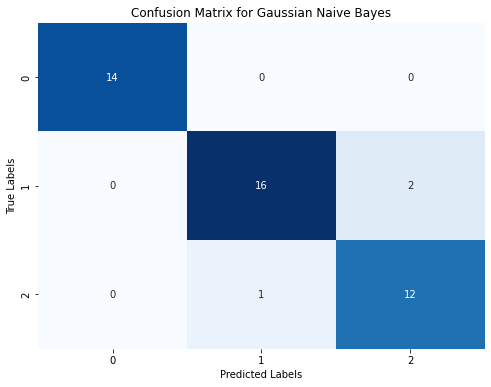

ROC curve is only available for binary classification.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, gnb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.show()

# ROC Curve - applicable only for binary classification
if len(set(y_test)) == 2:  # Check if it's binary classification
    y_prob = gnb.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Gaussian Naive Bayes")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only available for binary classification.")


In [15]:
cm

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 12]], dtype=int64)

In [16]:
# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(random_state=0)
# train the model
dt.fit(X_train, y_train)
# make predictions
dt_pred = dt.predict(X_test)
# print the accuracy
print("Accuracy of Decision Tree Classifier: ",
	accuracy_score(y_test, dt_pred))
# print other performance metrics
print("Precision of Decision Tree Classifier: ",
	precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",
	recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ",
	f1_score(y_test, dt_pred, average='weighted'))

Accuracy of Decision Tree Classifier:  0.9555555555555556
Precision of Decision Tree Classifier:  0.9555555555555556
Recall of Decision Tree Classifier:  0.9555555555555556
F1-Score of Decision Tree Classifier:  0.9555555555555556


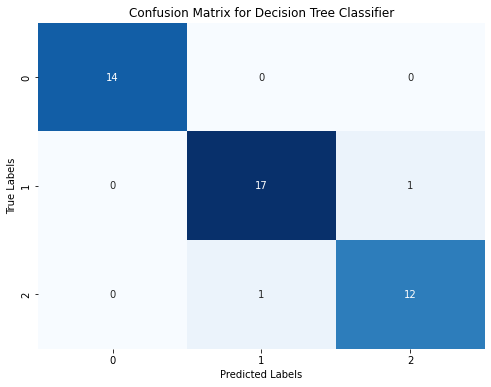

ROC curve is only available for binary classification.


In [18]:
from sklearn.tree import plot_tree

# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# ROC Curve - applicable only for binary classification
if len(set(y_test)) == 2:  # Check if it's binary classification
    y_prob = dt.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Decision Tree Classifier")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only available for binary classification.")


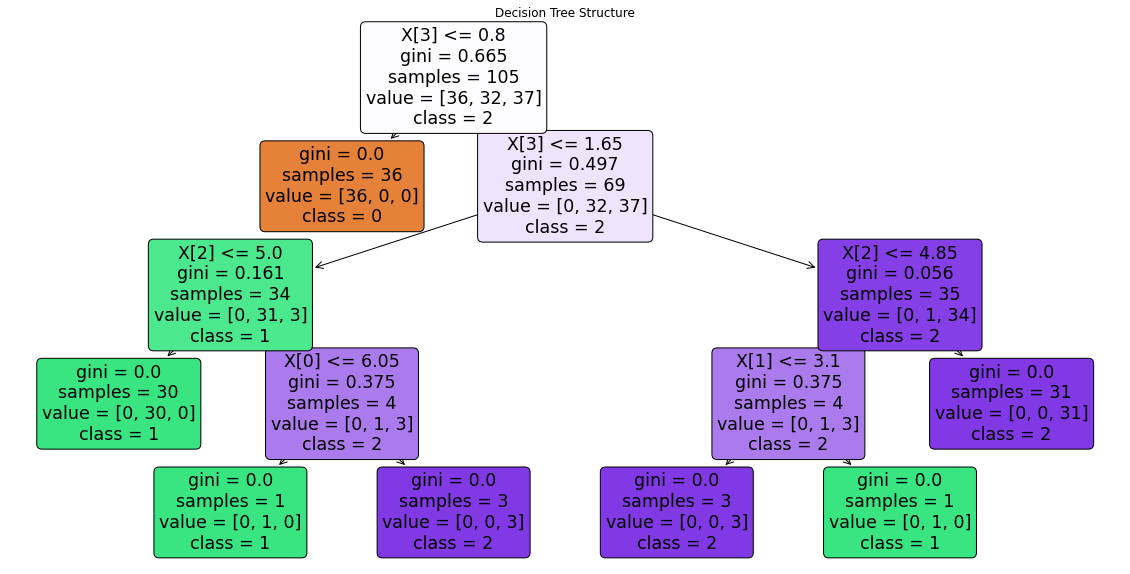

In [19]:
plt.figure(figsize=(20, 10))

# Adjust based on whether you have feature names or not
if hasattr(X_train, 'columns'):
    plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in set(y_train)], rounded=True)
else:
    plot_tree(dt, filled=True, class_names=[str(c) for c in set(y_train)], rounded=True)

plt.title("Decision Tree Structure")
plt.show()

In [20]:
# SUPPORT VECTOR MACHINE
svm_clf = svm.SVC(kernel='linear') # Linear Kernel
# train the model
svm_clf.fit(X_train, y_train)
# make predictions
svm_clf_pred = svm_clf.predict(X_test)
# print the accuracy
print("Accuracy of Support Vector Machine: ",
	accuracy_score(y_test, svm_clf_pred))
# print other performance metrics
print("Precision of Support Vector Machine: ",
	precision_score(y_test, svm_clf_pred, average='weighted'))
print("Recall of Support Vector Machine: ",
	recall_score(y_test, svm_clf_pred, average='weighted'))
print("F1-Score of Support Vector Machine: ",
	f1_score(y_test, svm_clf_pred, average='weighted'))


Accuracy of Support Vector Machine:  1.0
Precision of Support Vector Machine:  1.0
Recall of Support Vector Machine:  1.0
F1-Score of Support Vector Machine:  1.0


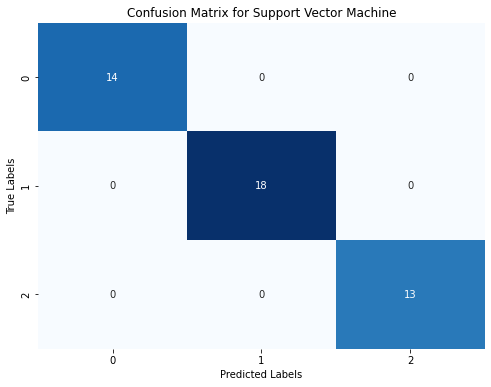

In [22]:

# Confusion Matrix
cm = confusion_matrix(y_test, svm_clf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()